# Animal classification
https://www.kaggle.com/datasets/alessiocorrado99/animals10?resource=download

This dataset contains 10 classes of animals. TIt contains about 28K medium quality animal images belonging to 10 categories: dog, cat, horse, spyder, butterfly, chicken, sheep, cow, squirrel, elephant.

Each class has about 2k to 5k images.

In [1]:
import tensorflow  as  tf
from  tensorflow  import  keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from sklearn.model_selection import train_test_split
import sklearn

import numpy as  np
import matplotlib.pyplot  as  plt
import os
import cv2
import random
import cv2 as cv
import pandas  as  pd
import tqdm as tqdm


config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

#print the number of GPU

print ( "Num GPUs Available: " ,  len ( tf.config.experimental.list_physical_devices ( 'GPU' )))

2023-01-03 12:10:15.709515: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-03 12:10:16.170008: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-03 12:10:16.326757: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-03 12:10:17.150791: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

Num GPUs Available:  1


2023-01-03 12:10:19.397122: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 12:10:19.398016: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 12:10:19.398166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 12:10:19.398285: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4117 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
2023-01-03 12:10:19.401125: I tensorflow/stream_executor/cuda/cuda_

In [7]:
path = "./dataset"

#for each folder in the dataset folder, split the data into training and test set

train_x = []
train_y = []
test_x = []
test_y = []

dizionario = {'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}

numSamplesPerClass = 500


for folder in tqdm.tqdm(os.listdir(path)):
    images = []
    labels = []
    cont = 0
    for img in os.listdir(os.path.join(path, folder)):
        if cont == numSamplesPerClass:
            break
        cont += 1
        #the image is in color
        img_array = cv2.imread(os.path.join(path, folder, img), cv2.IMREAD_COLOR)
        #resize the image
        new_array = cv2.resize(img_array, (150, 150))
        #append the image to the list
        images.append(new_array)
        #append the label to the list
        labels.append(dizionario[folder])
    #split the data into training and test set
    train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
    #append the training and test set to the list
    train_x.extend(train_images)
    train_y.extend(train_labels)
    test_x.extend(test_images)
    test_y.extend(test_labels)

#convert the list to numpy array
train_x = np.array(train_x)
train_y = np.array(train_y)

test_x = np.array(test_x)
test_y = np.array(test_y)

#map the label to the class name

#rescale the data
train_x = train_x / 255.0
test_x = test_x / 255.0

#split the training set into training and validation set
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

#convert the labels to one hot encoding
train_y = keras.utils.to_categorical(train_y, 10)
test_y = keras.utils.to_categorical(test_y, 10)
val_y = keras.utils.to_categorical(val_y, 10)


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(val_x.shape)
print(val_y.shape)








#tempo di esecuzione: 1min 30sec


 70%|███████   | 7/10 [00:03<00:01,  2.74it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


(3200, 150, 150, 3)
(3200, 10)
(1000, 150, 150, 3)
(1000, 10)
(800, 150, 150, 3)
(800, 10)


In [2]:
path = "./dataset"

#load the data from the dataset and use flow_from_directory and split the data into training and test set

train_datagen = ImageDataGenerator(rescale=1./255,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.2)


train_generator = train_datagen.flow_from_directory(
        path,
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        path,
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical',
        subset='validation')





Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [16]:
base_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
for layer in base_model.layers:
    layer.trainable = False

add_model = keras.Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(10, activation='softmax'))

model = keras.Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=1e-5), metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0   

In [17]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])


early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=5,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1,
)


callbacks = [
    early_stopping,
    lr_scheduler,
]


In [18]:
history = model.fit(train_generator, epochs=100, batch_size=32, validation_data=validation_generator, callbacks=callbacks, verbose=1)
model.save('model.h5')

Epoch 1/100
655/655 [==============================] - 296s 452ms/step - loss: 0.7392 - accuracy: 0.7588 - val_loss: 0.5635 - val_accuracy: 0.8154 - lr: 1.0000e-04
Epoch 2/100
655/655 [==============================] - 301s 459ms/step - loss: 0.4452 - accuracy: 0.8542 - val_loss: 0.4707 - val_accuracy: 0.8440 - lr: 1.0000e-04
Epoch 3/100
655/655 [==============================] - 311s 474ms/step - loss: 0.3692 - accuracy: 0.8800 - val_loss: 0.4165 - val_accuracy: 0.8670 - lr: 1.0000e-04
Epoch 4/100
655/655 [==============================] - 306s 467ms/step - loss: 0.3108 - accuracy: 0.8968 - val_loss: 0.4186 - val_accuracy: 0.8675 - lr: 1.0000e-04
Epoch 5/100
655/655 [==============================] - 307s 468ms/step - loss: 0.2709 - accuracy: 0.9116 - val_loss: 0.4604 - val_accuracy: 0.8511 - lr: 1.0000e-04
Epoch 6/100
655/655 [==============================] - 306s 467ms/step - loss: 0.2433 - accuracy: 0.9203 - val_loss: 0.4285 - val_accuracy: 0.8630 - lr: 1.0000e-04
Epoch 7/100
655/

164/164 [==============================] - 54s 328ms/step - loss: 0.4187 - accuracy: 0.8771
[0.41871896386146545, 0.8771024346351624]


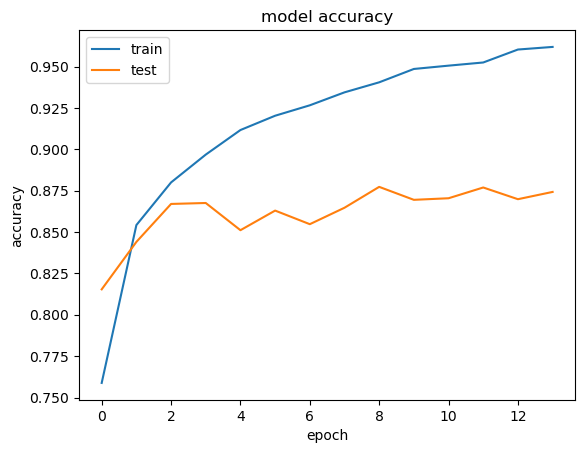

In [19]:
print(model.evaluate(validation_generator))

#plot the accuracy and loss
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()


In [12]:
#create a new model 
model2 = keras.Sequential()

#use conv2d, maxpooling2d, dropout and batchnormalization
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(keras.layers.BatchNormalization())

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(10, activation='softmax'))


model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 149, 149, 32)      0         
                                                                 
 batch_normalization_3 (Batc  (None, 149, 149, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 73, 73, 64)      

In [13]:
model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=5,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1,
)


callbacks = [
    early_stopping,
    lr_scheduler,
]


In [14]:
history2 = model2.fit(train_generator, epochs=100, batch_size=32, validation_data=validation_generator, callbacks=callbacks, verbose=1)

#save the model
model2.save('model2.h5')

Epoch 1/100
655/655 [==============================] - 278s 424ms/step - loss: 1.7860 - accuracy: 0.3886 - val_loss: 1.6687 - val_accuracy: 0.4646 - lr: 1.0000e-04
Epoch 2/100
655/655 [==============================] - 282s 430ms/step - loss: 1.3783 - accuracy: 0.5328 - val_loss: 1.3814 - val_accuracy: 0.5549 - lr: 1.0000e-04
Epoch 3/100
655/655 [==============================] - 282s 430ms/step - loss: 1.1931 - accuracy: 0.5952 - val_loss: 1.2603 - val_accuracy: 0.5885 - lr: 1.0000e-04
Epoch 4/100
655/655 [==============================] - 283s 432ms/step - loss: 1.0660 - accuracy: 0.6398 - val_loss: 1.2137 - val_accuracy: 0.5994 - lr: 1.0000e-04
Epoch 5/100
655/655 [==============================] - 282s 431ms/step - loss: 0.9663 - accuracy: 0.6728 - val_loss: 1.0766 - val_accuracy: 0.6495 - lr: 1.0000e-04
Epoch 6/100
655/655 [==============================] - 283s 432ms/step - loss: 0.8773 - accuracy: 0.7042 - val_loss: 0.9856 - val_accuracy: 0.6810 - lr: 1.0000e-04
Epoch 7/100
655/

164/164 [==============================] - 52s 314ms/step - loss: 1.0312 - accuracy: 0.7221
[1.0312449932098389, 0.7220947742462158]


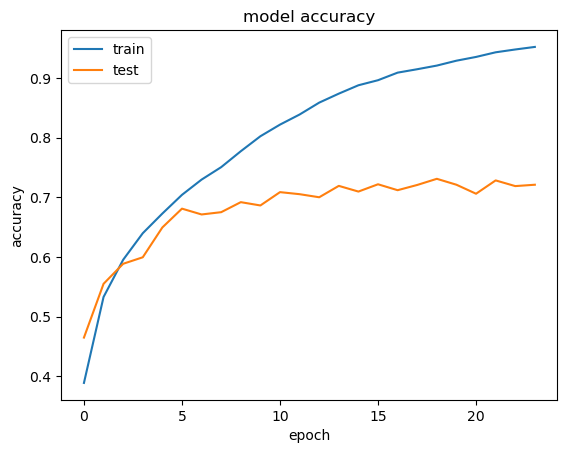

In [15]:
print(model2.evaluate(validation_generator))

#plot the accuracy and loss
plt.plot(history2.history['accuracy'])

plt.plot(history2.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()
